In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/airi/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-20 Python-3.9.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24265MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# !cd yolov5 && python detect.py --weights yolov5s.pt --source /home/airi/yolo/wider_face_data/People.mp4

In [28]:
img = 'https://thumbs.dreamstime.com/z/kids-spending-time-together-outdoors-running-square-warm-spring-day-happy-children-city-street-233826357.jpg'

In [15]:
results = model(img)
results.print()

image 1/1: 1108x1600 6 persons, 5 cars
Speed: 629.2ms pre-process, 59.7ms inference, 2.5ms NMS per image at shape (1, 3, 448, 640)


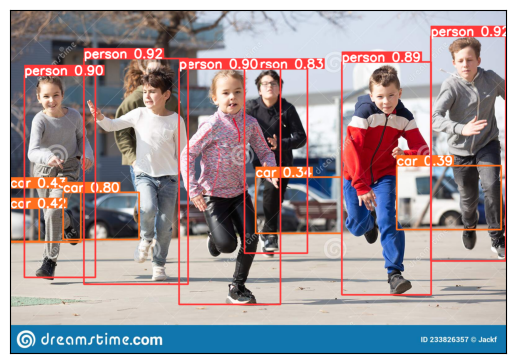

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import pathlib
import shutil 

In [17]:
def collect_images(folder_path):
    image_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith('.png')or file.endswith('.txt'):
                image_files.append(os.path.join(root, file))
    return image_files

In [18]:
main_folder_path = "wider_face_data/train_data/images"  
image_files = collect_images(main_folder_path)
len(image_files)

12880

In [19]:
main_folder_path = "wider_face_data/train_data/labels"  
image_files = collect_images(main_folder_path)
len(image_files)

12880

In [21]:
main_folder_path = "wider_face_data/val_data/images"  
image_files = collect_images(main_folder_path)
len(image_files)

3226

In [22]:
main_folder_path = "wider_face_data/val_data/labels"  
image_files = collect_images(main_folder_path)
len(image_files)

3227

In [ ]:
source_folder = "WIDER_train/WIDER_val/images/"
destination_folder = 'WIDER_train/wider_val/'

for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    
    if os.path.isdir(folder_path):
        
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                
                shutil.copy2(file_path, destination_folder)

In [23]:
!cd yolov5 && python train.py --img 640 --batch 64 --epochs 10 --data dataset.yaml --weights yolov5s.pt

requirements: Ultralytics requirement "gitpython" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 926.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://gith

Model summary: 214 layers, 7022326 parameters, 7022326 gradients

Transferred 343/349 items from yolov5s.pt
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias
WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://docs.ultralytics.com/yolov5/tutorials/multi_gpu_training to get started.
train: Scanning /home/airi/yolo/wider_face_data/train_data/labels... 12880 image
train: WARNING ⚠️ /home/airi/yolo/wider_face_data/train_data/images/2_Demonstration_Protesters_2_231.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/airi/yolo/wider_face_data/train_data/images/37_Soccer_Soccer_37_851.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/airi/yolo/wider_face_data/train_data/images/54_Rescue_rescuepeople_54_29.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0254]
train: New cache created: /home/airi/yolo/wide

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp16/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/airi/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-20 Python-3.9.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24265MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [30]:
!cd yolov5 && python detect.py --weights /home/airi/yolo/yolov5/runs/train/exp16/weights/last.pt --source /home/airi/yolo/kids-spending-time-together-outdoors-running-square-warm-spring-day-happy-children-city-street-233826357.jpg

detect: weights=['/home/airi/yolo/yolov5/runs/train/exp16/weights/last.pt'], source=/home/airi/yolo/kids-spending-time-together-outdoors-running-square-warm-spring-day-happy-children-city-street-233826357.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /home/airi/yolo/yolov8_env/lib/python3.9/site-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.9.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24265MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/airi/yolo/kids-spending-time-together-outdoors-running-square-warm-spring-da

In [31]:
!cd yolov5 && python detect.py --weights /home/airi/yolo/yolov5/runs/train/exp16/weights/last.pt --source /home/airi/yolo/wider_face_data/People.mp4

detect: weights=['/home/airi/yolo/yolov5/runs/train/exp16/weights/last.pt'], source=/home/airi/yolo/wider_face_data/People.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /home/airi/yolo/yolov8_env/lib/python3.9/site-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.9.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24265MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 5 faces, 37.7ms
video 1/1 (2/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 5 faces, 4.2ms
vid

video 1/1 (88/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.1ms
video 1/1 (89/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.1ms
video 1/1 (90/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.1ms
video 1/1 (91/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.0ms
video 1/1 (92/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.1ms
video 1/1 (93/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.0ms
video 1/1 (94/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.0ms
video 1/1 (95/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.1ms
video 1/1 (96/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.0ms
video 1/1 (97/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.1ms
video 1/1 (98/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 3 faces, 4.0ms
video 1/1 (99/942) /home/airi/yolo/wider_face_data/Peo

video 1/1 (186/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.0ms
video 1/1 (187/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 5.1ms
video 1/1 (188/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.5ms
video 1/1 (189/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.5ms
video 1/1 (190/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 5 faces, 4.9ms
video 1/1 (191/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.6ms
video 1/1 (192/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.5ms
video 1/1 (193/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 5 faces, 4.5ms
video 1/1 (194/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.4ms
video 1/1 (195/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 5 faces, 4.6ms
video 1/1 (196/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 5 faces, 4.5ms
video 1/1 (197/942) /home/airi/yolo/wider_f

video 1/1 (283/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (284/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.3ms
video 1/1 (285/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (286/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.7ms
video 1/1 (287/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.3ms
video 1/1 (288/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.1ms
video 1/1 (289/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (290/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (291/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.3ms
video 1/1 (292/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (293/942) /home/airi/yolo/wider_face_dat

video 1/1 (372/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.3ms
video 1/1 (373/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.2ms
video 1/1 (374/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.4ms
video 1/1 (375/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.2ms
video 1/1 (376/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.2ms
video 1/1 (377/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.2ms
video 1/1 (378/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.3ms
video 1/1 (379/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.4ms
video 1/1 (380/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.3ms
video 1/1 (381/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.4ms
video 1/1 (382/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.9ms
video 1/1 (383/942) /home/airi/yolo/wider_f

video 1/1 (468/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (469/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.2ms
video 1/1 (470/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (471/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.2ms
video 1/1 (472/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (473/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (474/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (475/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.4ms
video 1/1 (476/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (477/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.2ms
video 1/1 (478/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.9ms
video 1/1 (479/942) /home/airi/yolo/wider_face_data/Pe

video 1/1 (566/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (567/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.2ms
video 1/1 (568/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 1 face, 4.3ms
video 1/1 (569/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.2ms
video 1/1 (570/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 9 faces, 4.3ms
video 1/1 (571/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 10 faces, 4.3ms
video 1/1 (572/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 10 faces, 4.3ms
video 1/1 (573/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 9 faces, 4.2ms
video 1/1 (574/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 8 faces, 5.0ms
video 1/1 (575/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 8 faces, 4.4ms
video 1/1 (576/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 8 faces, 4.3ms
video 1/1 (577/942) /home/airi/yolo/wider_fa

video 1/1 (661/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.2ms
video 1/1 (662/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.3ms
video 1/1 (663/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.2ms
video 1/1 (664/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.2ms
video 1/1 (665/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.2ms
video 1/1 (666/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.2ms
video 1/1 (667/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.4ms
video 1/1 (668/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 6 faces, 4.3ms
video 1/1 (669/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.3ms
video 1/1 (670/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.7ms
video 1/1 (671/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 7 faces, 4.2ms
video 1/1 (672/942) /home/airi/yolo/wider_f

video 1/1 (756/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.3ms
video 1/1 (757/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.3ms
video 1/1 (758/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.2ms
video 1/1 (759/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.2ms
video 1/1 (760/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.2ms
video 1/1 (761/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.3ms
video 1/1 (762/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.3ms
video 1/1 (763/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.3ms
video 1/1 (764/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.3ms
video 1/1 (765/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.2ms
video 1/1 (766/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 4 faces, 4.9ms
video 1/1 (767/942) /home/airi/yolo/wider_f

video 1/1 (849/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (850/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (851/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.1ms
video 1/1 (852/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (853/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.0ms
video 1/1 (854/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (855/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.1ms
video 1/1 (856/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.1ms
video 1/1 (857/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (858/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.0ms
video 1/1 (859/942) /home/airi/yolo/wider_face_dat

video 1/1 (941/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.2ms
video 1/1 (942/942) /home/airi/yolo/wider_face_data/People.mp4: 384x640 (no detections), 4.1ms
Speed: 0.2ms pre-process, 4.3ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp24
